# Evaluating the Features

In this section, we have the scores,i.e, the features for all the 420 images taken and we store that to a variable called scores and then store the class labels to a variable called targets. We then produce the heat maps based on the correlation matrix and then give histogram plot for the correlation matrix. Finally, we conclude with the AUC values for all the class labels with plots for visualisation.

In [1]:
# Importing the required packages
import scipy.io as sio
import os
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc , classification_report
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Mentioning the working directory
source_dir='./'

In [3]:
# Accessing covid.mat file and getting the data from the file
covid_features=sio.loadmat(os.path.join(source_dir,'covid.mat')) 
covid_features=covid_features['covid'] 
# Accessing normal.mat file and getting the data from the file
normal_features=sio.loadmat(os.path.join(source_dir,'normal.mat')) 
normal_features=normal_features['normal']  
# Accessing pneumonia.mat file and getting the data from the file
pneumonia_features=sio.loadmat(os.path.join(source_dir,'pneumonia.mat')) 
pneumonia_features=pneumonia_features['pneumonia']  
# Extracting the scores
scores=np.concatenate((covid_features[:,:-1],normal_features[:,:-1],pneumonia_features[:,:-1]), axis=0)
# Extracting the target labels, the last column alone
targets=np.concatenate((covid_features[:,-1],normal_features[:,-1],pneumonia_features[:,-1]), axis=0)

In [6]:
# Normalization of the data between 0 and 1
min_max_scaler=MinMaxScaler()
scores = min_max_scaler.fit_transform(scores) 

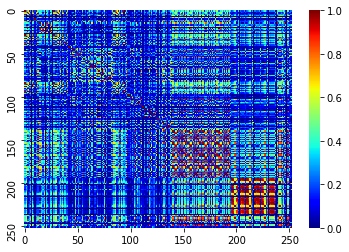

In [7]:
#Creating a dataframe df for the scores
df = pd.DataFrame(scores)             
#Obtaining the Correlation Matrix by filling the missing entries as zero
corrMatrix = df.corr().abs().fillna(0)
fig = plt.figure()
#Plotting the Heatmaps obtained from the correlation matrix
sn.heatmap(corrMatrix,xticklabels=50,yticklabels=50,cmap='jet')
#Saving the image
plt.savefig('corr_map',dpi=300,format='eps')

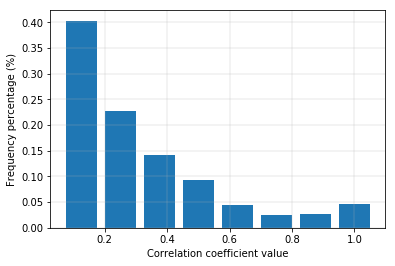

In [8]:
#Plotting the histogram from the correlation matrix for correlation coeff v/s Frequency Percentage
fig = plt.figure()
(h,x)=np.histogram(corrMatrix.to_numpy().reshape(1,253*253), bins=8) 
plt.bar(x[1:],h/(252*252),width=0.1)            
plt.grid(linewidth=.3)  
plt.xlabel('Correlation coefficient value')
plt.ylabel('Frequency percentage (%)')
plt.savefig('corr_hist.jpg',dpi=300)

252
1.0


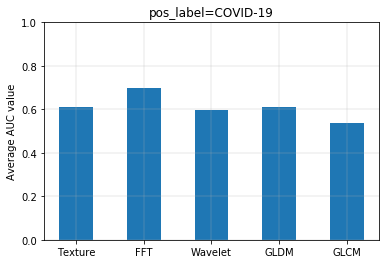

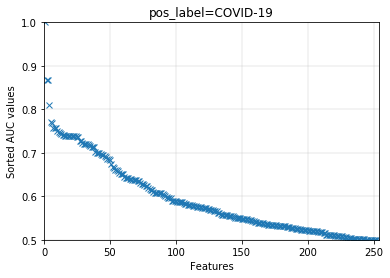

In [9]:
#Considering the class label as Covid we are finding the AUC values
pos_label=0   
roc_list=[]  
for idx in range(scores.shape[1]):               
    fpr, tpr, thresholds = roc_curve(targets, scores[:,idx], pos_label=pos_label)
    auc_value=auc(fpr, tpr)
    if auc_value<0.5:
        auc_value=1-auc_value
    roc_list.append(auc_value)# calculate auc value
# Printing roc value
print(np.argmax(roc_list))
# Printing max value from the list
print(np.max(roc_list))
fig = plt.figure()
# Creating bar-plot
plt.bar([1,2,3,4,5],[np.mean(roc_list[:14]),np.mean(roc_list[14:28])
        ,np.mean(roc_list[28:140]),np.mean(roc_list[140:196]),np.mean(roc_list[196:252])]
        ,width=0.5)
# Formatting the plots
plt.xticks([1,2,3,4,5], ('Texture', 'FFT', 'Wavelet', 'GLDM', 'GLCM'))
plt.grid(linewidth=.3)
plt.ylim([0, 1])
plt.title('pos_label=COVID-19')
plt.ylabel('Average AUC value')
# Saving the image to directory
plt.savefig('avg_bar_pos_COVID.jpg',dpi=300)
# Plotting graph based on sorted values.
fig = plt.figure()
plt.plot([i for i in range(1,scores.shape[1]+1)],np.sort(roc_list)[::-1],'x')
plt.grid(linewidth=.3)
plt.xlim([0.0, scores.shape[1]+1])
plt.ylim([0.5, 1])
plt.xlabel('Features')
plt.ylabel('Sorted AUC values')
plt.title('pos_label=COVID-19')
# Saving the image to directory
plt.savefig('auc_pos_COVID.jpg',dpi=300)

190
0.9254051304411017


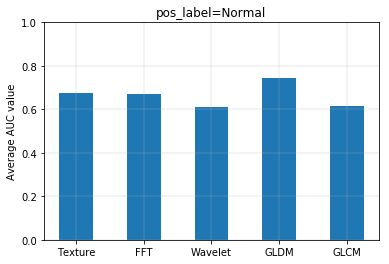

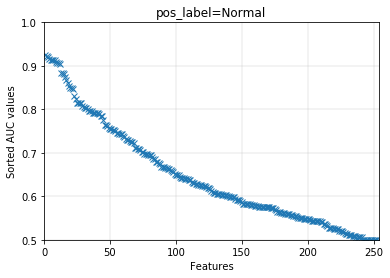

In [10]:
#Considering the class label as Normal we are finding the AUC values
pos_label=1   
roc_list=[]  
for idx in range(scores.shape[1]):               
    fpr, tpr, thresholds = roc_curve(targets, scores[:,idx], pos_label=pos_label)
    auc_value=auc(fpr, tpr)
    if auc_value<0.5:
        auc_value=1-auc_value
    roc_list.append(auc_value)# calculate auc value
# Printing roc value
print(np.argmax(roc_list))
# Printing max value from the list
print(np.max(roc_list))
fig = plt.figure()
# Creating bar-plot
plt.bar([1,2,3,4,5],[np.mean(roc_list[:14]),np.mean(roc_list[14:28])
        ,np.mean(roc_list[28:140]),np.mean(roc_list[140:196]),np.mean(roc_list[196:252])]
        ,width=0.5)
# Formatting the plots
plt.xticks([1,2,3,4,5], ('Texture', 'FFT', 'Wavelet', 'GLDM', 'GLCM'))
plt.grid(linewidth=.3)
plt.ylim([0, 1])
plt.title('pos_label=Normal')
plt.ylabel('Average AUC value')
# Saving the image to directory
plt.savefig('avg_bar_pos_Normal.jpg',dpi=300)

# Plotting graph based on sorted values.
fig = plt.figure()
plt.plot([i for i in range(1,scores.shape[1]+1)],np.sort(roc_list)[::-1],'x')
plt.grid(linewidth=.3)
plt.xlim([0.0, scores.shape[1]+1])
plt.ylim([0.5, 1])
plt.xlabel('Features')
plt.ylabel('Sorted AUC values')
plt.title('pos_label=Normal')
# Saving the image to directory
plt.savefig('auc_pos_Normal.jpg',dpi=300)

252
1.0


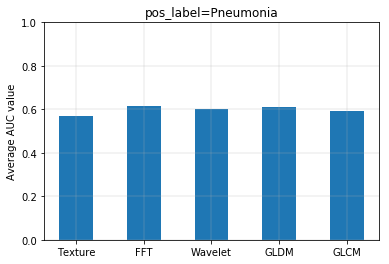

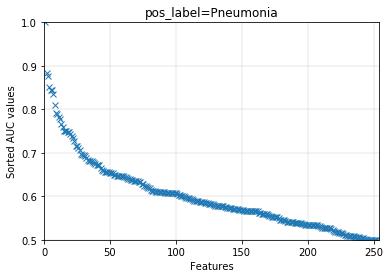

In [11]:
#Considering the class label as Pneumonia we are finding the AUC values
pos_label=2   
roc_list=[]  
for idx in range(scores.shape[1]):               
    fpr, tpr, thresholds = roc_curve(targets, scores[:,idx], pos_label=pos_label)
    auc_value=auc(fpr, tpr)
    if auc_value<0.5:
        auc_value=1-auc_value
    roc_list.append(auc_value)# calculate auc value
# Printing roc value
print(np.argmax(roc_list))
# Printing max value from the list
print(np.max(roc_list))
fig = plt.figure()
# Creating bar-plot
plt.bar([1,2,3,4,5],[np.mean(roc_list[:14]),np.mean(roc_list[14:28])
        ,np.mean(roc_list[28:140]),np.mean(roc_list[140:196]),np.mean(roc_list[196:252])]
        ,width=0.5)
# Formatting the plots
plt.xticks([1,2,3,4,5], ('Texture', 'FFT', 'Wavelet', 'GLDM', 'GLCM'))
plt.grid(linewidth=.3)
plt.ylim([0, 1])
plt.title('pos_label=Pneumonia')
plt.ylabel('Average AUC value')
# Saving the image to directory
plt.savefig('avg_bar_pos_Pneumonia.jpg',dpi=300)

# Plotting graph based on sorted values.
fig = plt.figure()
plt.plot([i for i in range(1,scores.shape[1]+1)],np.sort(roc_list)[::-1],'x')
plt.grid(linewidth=.3)
plt.xlim([0.0, scores.shape[1]+1])
plt.ylim([0.5, 1])
plt.xlabel('Features')
plt.ylabel('Sorted AUC values')
plt.title('pos_label=Pneumonia')
# Saving the image to directory
plt.savefig('auc_pos_Pneumonia.jpg',dpi=300)